In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Read all team's friendlies and qualifiers end game datasets within a year before the world cup

In [ ]:
def file_searcher(folder,filesname):
  for files in os.walk(folder):
    for match in files: 
     for i in match:
        if i == filesname:
          return True
        else:
          return False

In [ ]:
def get_data(path):
  data = pd.read_excel(path)
  file_name = os.path.basename(path)
  country = os.path.splitext(file_name)[0].split('_')[-2]
  data['country'] = country
  data = data[['country','GF','GA']]
  return data


In [ ]:
def calculate_team_power(data):
  df = pd.DataFrame(columns = ['country','team_avg_goal','team_avg_goal_allowed','matches'])
  #print(data['country'].iloc[0], data['GF'].sum())
  df.loc[len(df.index)] = [data['country'].iloc[0], data['GF'].sum(), data['GA'].sum(), data['GF'].notnull().count()] 
  df['team_avg_goal'] = df['team_avg_goal']/df['matches']
  df['team_avg_goal_allowed'] = df['team_avg_goal_allowed']/df['matches']
  #print(df)
  return df

In [ ]:
count = 0
folder = '/content/drive/MyDrive/Sports Analytics Group Project/Matches_data_prior_to_World_Cup'
data = pd.DataFrame(columns = ['country','team_avg_goal','team_avg_goal_allowed','matches'])
for files in os.walk(folder):
  for match in files: 
    for i in match:
      if len(i) != 1:
        path = folder + '/' + i
        df = get_data(path)
        df1 = calculate_team_power(df)
        data = data.append(df1, ignore_index = True)
        count +=1
print(count)
data.sort_values('country', inplace = True)

In [ ]:
data.head()

,country,team_avg_goal,team_avg_goal_allowed,matches
0,Argentina,1.84,0.4,25
19,Austrilia,1.666667,0.666667,24
20,Belgium,1.611111,1.055556,18
3,Brazil,2.28,0.28,25
16,Cameroon,1.36,0.84,25


In [ ]:
data = data.reset_index(drop=True)

# Offense/Defense Strength calculation

In [ ]:
rating = pd.read_excel('/content/drive/MyDrive/Sports Analytics Group Project/Football elo ratings.xlsx')

/usr/local/lib/python3.8/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
rating.head()

,Unnamed: 0,Team,Rating,Avg. rank,Avg. Rating,1 year Change in rank,1 year Change in rating,total matches,home matches,away mathces,neutral,wins,losses,draws,For Goal,Against Goal,rating before wc
0,1.0,Brazil,2169.0,4.0,1999.0,0.0,46.0,1028.0,364.0,331.0,333.0,656.0,161.0,211.0,2233.0,912.0,2123
1,2.0,Argentina,2143.0,5.0,1984.0,1.0,0.0,1063.0,368.0,405.0,290.0,574.0,226.0,263.0,2004.0,1109.0,2143
2,3.0,Spain,2048.0,7.0,1941.0,2.0,19.0,739.0,324.0,290.0,125.0,432.0,135.0,172.0,1486.0,663.0,2029
3,4.0,France,2005.0,16.0,1784.0,−2,-69.0,892.0,455.0,330.0,107.0,443.0,262.0,187.0,1595.0,1241.0,2074
4,5.0,Netherlands,2040.0,15.0,1844.0,7.0,107.0,855.0,405.0,345.0,105.0,439.0,230.0,186.0,1777.0,1091.0,1933


In [ ]:
rating['level'] = rating['Rating']/(rating['Rating'].sum()/32)

In [ ]:
rating.sort_values('Team', inplace = True)

In [ ]:
rating.head()

,Unnamed: 0,Team,Rating,Avg. rank,Avg. Rating,1 year Change in rank,1 year Change in rating,total matches,home matches,away mathces,neutral,wins,losses,draws,For Goal,Against Goal,rating before wc,level
1,2.0,Argentina,2143.0,5.0,1984.0,1.0,0.0,1063.0,368.0,405.0,290.0,574.0,226.0,263.0,2004.0,1109.0,2143,1.157616
24,36.0,Australia,1719.0,34.0,1671.0,−3,1.0,591.0,249.0,214.0,128.0,303.0,164.0,124.0,1208.0,661.0,1718,0.928577
6,8.0,Belgium,2007.0,23.0,1751.0,−4,-127.0,836.0,401.0,358.0,77.0,370.0,295.0,171.0,1516.0,1325.0,2134,1.084151
0,1.0,Brazil,2169.0,4.0,1999.0,0.0,46.0,1028.0,364.0,331.0,333.0,656.0,161.0,211.0,2233.0,912.0,2123,1.171661
31,55.0,Cameroon,1610.0,52.0,1605.0,6.0,12.0,618.0,174.0,236.0,208.0,269.0,162.0,187.0,895.0,677.0,1598,0.869697


In [ ]:
rating = rating.reset_index(drop = True)

In [ ]:
data['Offense Strength'] = data['team_avg_goal'] * rating['level']

In [ ]:
data['Defense Strength'] = data['team_avg_goal_allowed'] /rating['level']

In [ ]:
data.head()

,country,team_avg_goal,team_avg_goal_allowed,matches,Offense Strength,Defense Strength
0,Argentina,1.84,0.4,25,2.130013,0.345538
1,Austrilia,1.666667,0.666667,24,1.547629,0.717944
2,Belgium,1.611111,1.055556,18,1.746687,0.973624
3,Brazil,2.28,0.28,25,2.671386,0.238977
4,Cameroon,1.36,0.84,25,1.182788,0.965853


In [ ]:
data.sort_values('Defense Strength')

,country,team_avg_goal,team_avg_goal_allowed,matches,Offense Strength,Defense Strength
3,Brazil,2.28,0.28,25,2.671386,0.238977
0,Argentina,1.84,0.4,25,2.130013,0.345538
18,Morocco,1.833333,0.5,24,2.020291,0.45373
24,Senegal,1.590909,0.545455,22,1.631112,0.53201
15,Japan,1.608696,0.521739,23,1.55289,0.540489
7,Croatia,1.428571,0.571429,21,1.487051,0.548957
29,Tunisia,1.15,0.55,20,1.11694,0.566279
26,Spain,2.0,0.631579,19,2.212596,0.570894
27,States,1.25,0.65,20,1.284289,0.632646
23,SaudiArabia,1.310345,0.586207,29,1.194106,0.64327


In [ ]:
data.sort_values('Offense Strength', ascending = False)

,country,team_avg_goal,team_avg_goal_allowed,matches,Offense Strength,Defense Strength
3,Brazil,2.28,0.28,25,2.671386,0.238977
19,Netherlands,2.4,0.9,20,2.351748,0.918466
26,Spain,2.0,0.631579,19,2.212596,0.570894
0,Argentina,1.84,0.4,25,2.130013,0.345538
10,England,2.052632,0.842105,19,2.128896,0.811938
18,Morocco,1.833333,0.5,24,2.020291,0.45373
12,Germany,1.9,0.85,20,2.014727,0.801598
8,Denmark,1.85,0.7,20,1.969702,0.65746
25,Serbia,2.0,1.15,20,1.92954,1.191994
21,Portugal,2.1,0.6,20,1.905772,0.66115


# xG calculation

In [ ]:
def predict_score_in_match(team1,team2):
     team1_prediction = float(data.loc[data['country'] == team1]['Offense Strength'].values) * float(data.loc[data['country'] == team2]['Defense Strength'].values) #1.238636(average team goal per match in world cup 12.01.2022)
     team2_prediction = float(data.loc[data['country'] == team2]['Offense Strength'].values) * float(data.loc[data['country'] == team1]['Defense Strength'].values) #1.238636
     return [team1_prediction,team2_prediction]

In [ ]:
England_France = predict_score_in_match('England','France')

In [ ]:
England_France

[1.4196088725554539, 1.5144980506822612]

# Poisson model implementaion

In [ ]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scipy.stats as st

poi = pd.DataFrame(np.nan, index=[0, 1, 2, 3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
prob_draw =float()
prob_t1_win =float()
prob_t2_win =float()
for x in range(0,8,1): #number of goals home team
    for y in range(0,8,1): #number of goals away team
        prob = st.poisson.pmf(x,England_France[0]) * st.poisson.pmf(y,England_France[1])
        poi[y][x]= prob
        if x == y:
            prob_draw += prob
        elif x > y:
            prob_t1_win += prob
        else:
            prob_t2_win += prob

In [ ]:
prob_draw

0.24579829027741065

In [ ]:
prob_t1_win

0.3559158096016917

In [ ]:
prob_t2_win

0.3979880269719507

In [ ]:
States_Netherlands = predict_score_in_match('States','Netherlands')

In [ ]:
States_Netherlands

[1.1795755237045202, 1.4878233438485806]

In [ ]:
poi = pd.DataFrame(np.nan, index=[0, 1, 2, 3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
prob_draw =float()
prob_t1_win =float()
prob_t2_win =float()
for x in range(0,8,1): #number of goals home team
    for y in range(0,8,1): #number of goals away team
        prob = st.poisson.pmf(x,States_Netherlands[0]) * st.poisson.pmf(y,States_Netherlands[1])
        poi[y][x]= prob
        if x == y:
            prob_draw += prob
        elif x > y:
            prob_t1_win += prob
        else:
            prob_t2_win += prob

In [ ]:
prob_draw

0.25640358099627786

In [ ]:
prob_t1_win

0.30063651814561415

In [ ]:
prob_t2_win

0.44276653222948936

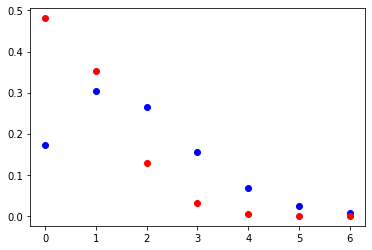

In [ ]:
x = np.arange(0, 7, 1)
y = np.arange(0, 7, 1)
t1 = st.poisson.pmf(x,Portugal_Switzerland[0])
t2 = st.poisson.pmf(y,Portugal_Switzerland[1])
plt.plot(x, t1, 'bo') 
plt.plot(y, t2, 'ro') 

In [ ]:
Qatar_vs_France = predict_score_in_match('Qatar','France')

In [ ]:
Qatar_vs_France

[0.6993713632585203, 1.5839704383282365]

In [ ]:
Qatar_vs_Canada = predict_score_in_match('Qatar','Canada')

In [ ]:
Qatar_vs_Canada

[0.7871199324324323, 1.4012477064220183]

In [ ]:
poi = pd.DataFrame(np.nan, index=[0, 1, 2, 3,4,5,6,7], columns=[0,1,2,3,4,5,6,7])
prob_draw =float()
prob_t1_win =float()
prob_t2_win =float()
for x in range(0,8,1): #number of goals home team
    for y in range(0,8,1): #number of goals away team
        prob = poisson.pmf(x,States_Netherlands[0]) * poisson.pmf(y,States_Netherlands[1])
        poi[y][x]= prob
        if x == y:
            prob_draw += prob
        elif x > y:
            prob_t1_win += prob
        else:
            prob_t2_win += prob
poi


,0,1,2,3,4,5,6,7
0,0.069433,0.103303,0.076849,0.038112,0.014176,0.004218,1.046018e-03,2.223271e-04
1,0.081901,0.121854,0.090649,0.044956,0.016722,0.004976,1.233857e-03,2.622516e-04
2,0.048304,0.071868,0.053464,0.026515,0.009862,0.002935,7.277138e-04,1.546728e-04
3,0.018993,0.028258,0.021021,0.010425,0.003878,0.001154,2.861311e-04,6.081608e-05
4,0.005601,0.008333,0.006199,0.003074,0.001144,0.000340,8.437832e-05,1.793429e-05
5,0.001321,0.001966,0.001462,0.000725,0.000270,0.000080,1.990612e-05,4.230970e-06
6,0.000260,0.000386,0.000288,0.000143,0.000053,0.000016,3.913462e-06,8.317914e-07
7,0.000044,0.000065,0.000048,0.000024,0.000009,0.000003,6.594606e-07,1.401658e-07


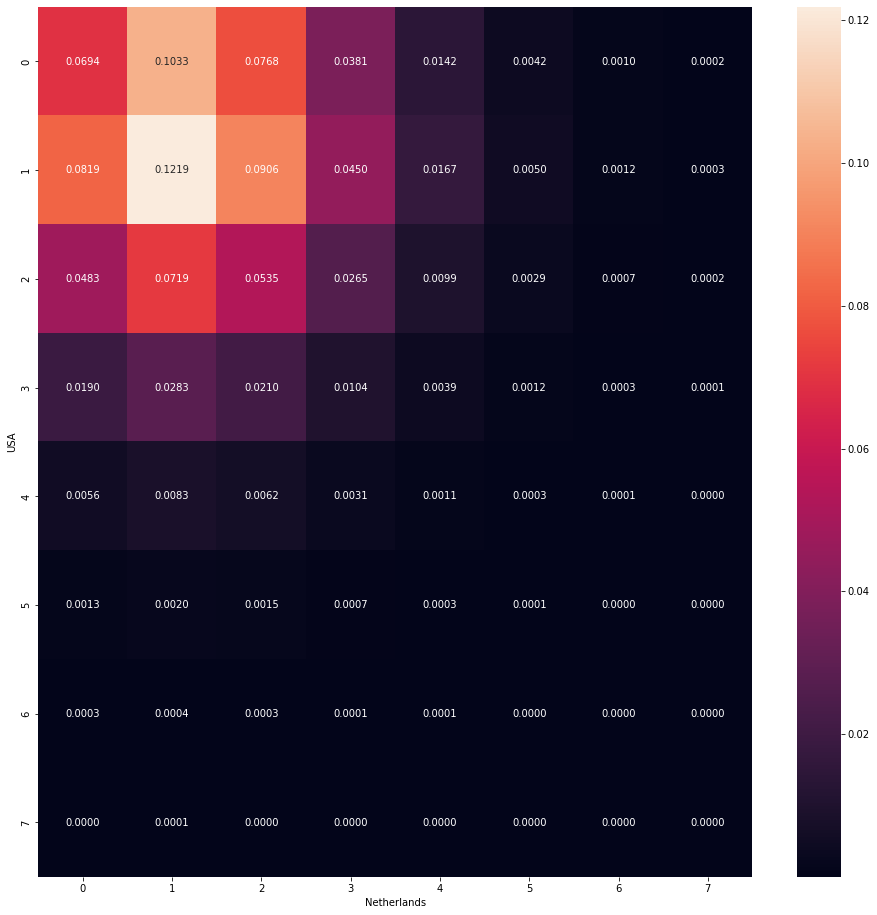

In [ ]:
import seaborn as sns
plt.figure(figsize=(16, 16))
s = sns.heatmap(poi,annot=True,   fmt=".4f") #cmap="YlGnBu"
s.set(xlabel='Netherlands', ylabel='USA')
sns.set(font_scale=2)